# Q1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import multivariate_normal as mvn

In [ ]:
#Ref: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
from matplotlib.patches import Ellipse
def plot_2D(data, centers, y_pred, gmm, axes_label):
    plt.figure(figsize=[10,6])
    ax = plt.gca()
    
    # Plot points according to the value of their max probability
    size = 100 * gmm.predict_proba(data).max(1) ** 2  # square emphasizes differences
    ax.scatter(data[:, 0], data[:, 1], c=y_pred, cmap='viridis', s=size)
    
    # Plot the cluster area depending on the mean and covariance
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        # Convert covariance to principal axes
        if covar.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covar)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width = 2 * np.sqrt(covar)
            height = 2 * np.sqrt(covar)
        
        # Draw the Ellipse for n*sigma
        for n in range(1, 4):
            ax.add_patch(Ellipse(pos, n*width, n*height, angle, alpha=0.1*(w/gmm.weights_.max())))
            
    ax.axis('equal')
    plt.grid()
    plt.title('K='+str(i),fontsize=15)
    plt.xlabel(axes_label[0],fontsize=15)
    plt.ylabel(axes_label[1],fontsize=15)
    plt.show()

In [ ]:
def find_inertia(k,centroids,data):
    sse_error=0
    for i in range(len(data)):
        min_val= np.inf
        for j in range(k):
            temp = (data[i][0]-centroids[j][0])**2 + (data[i][1]-centroids[j][1])**2
            min_val = min(min_val,temp)
        sse_error = sse_error + min_val
    return sse_error

# Q1 a)

In [ ]:
data = pd.read_excel('Question2a.xlsx')
data.head()

,x,y
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


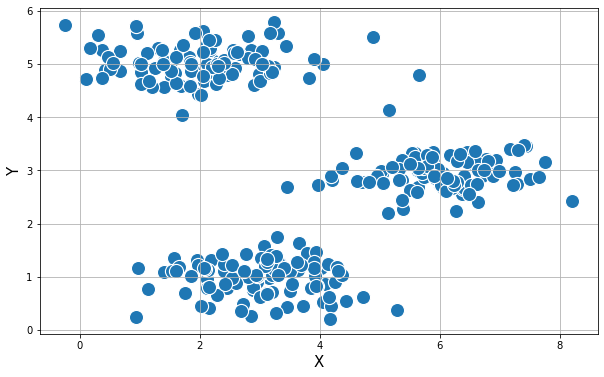

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['x'],data['y'],s=200)
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.grid()

In [ ]:
# Standardize data
df=[]
df.append(data['x'])
df.append(data['y'])
df=np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Q1a 3) Visualize the cluster formation for each k

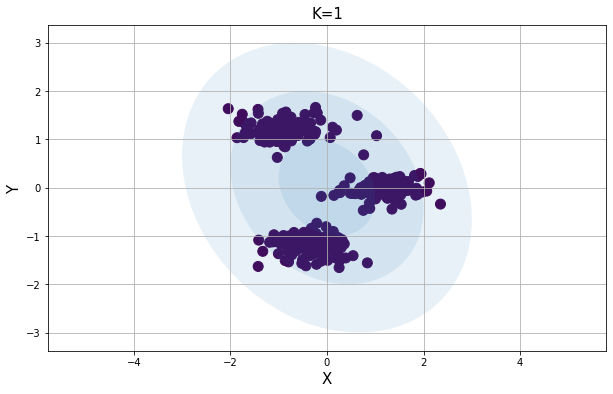

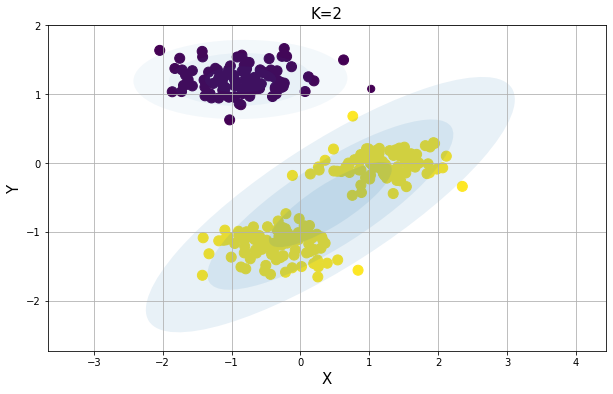

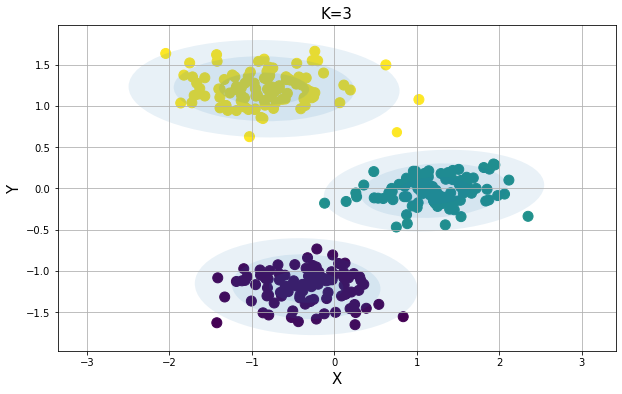

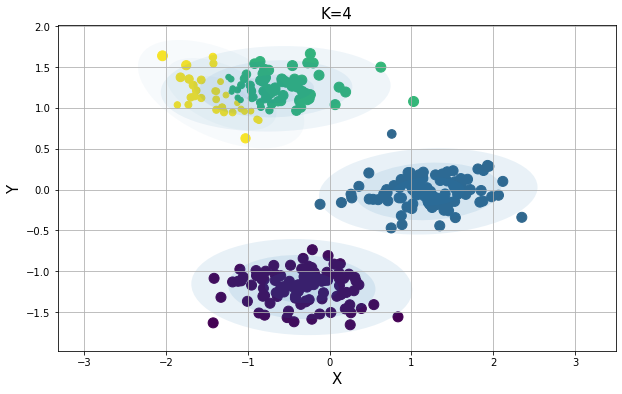

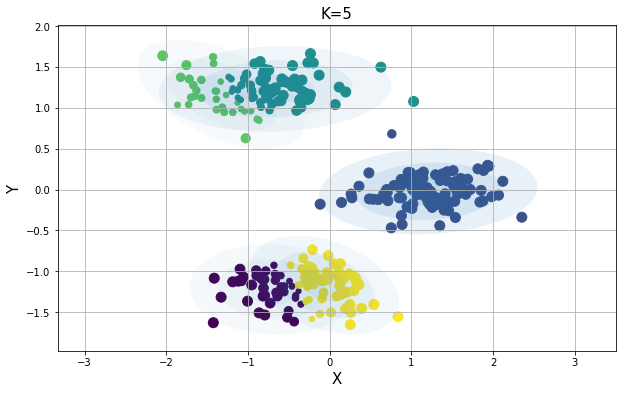

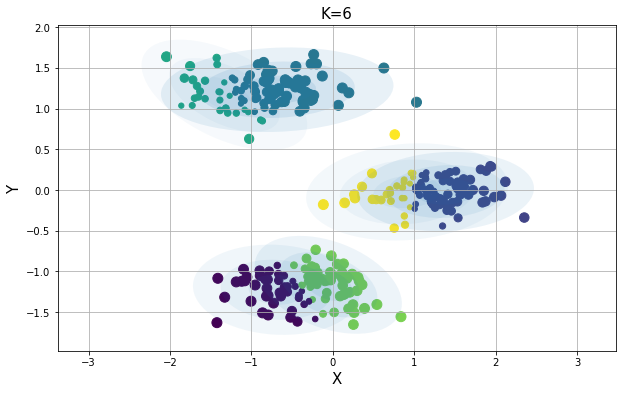

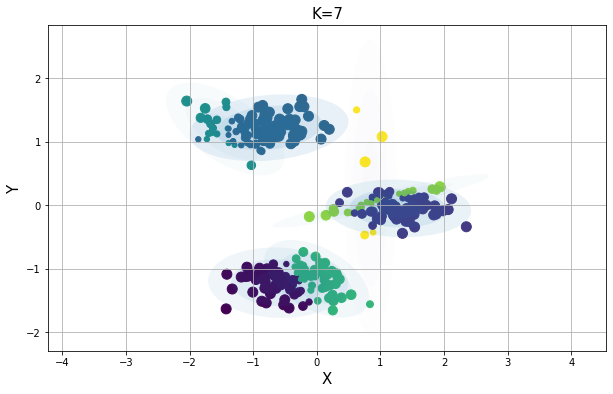

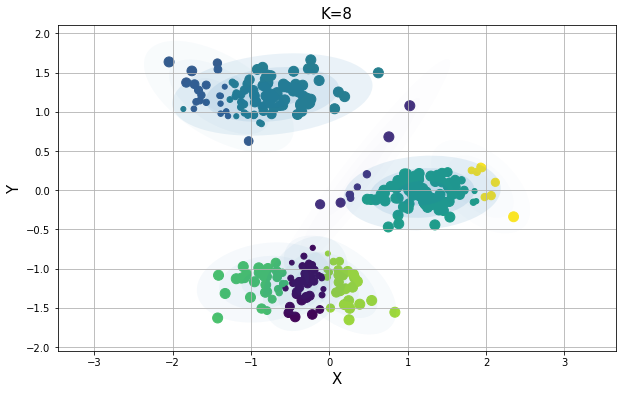

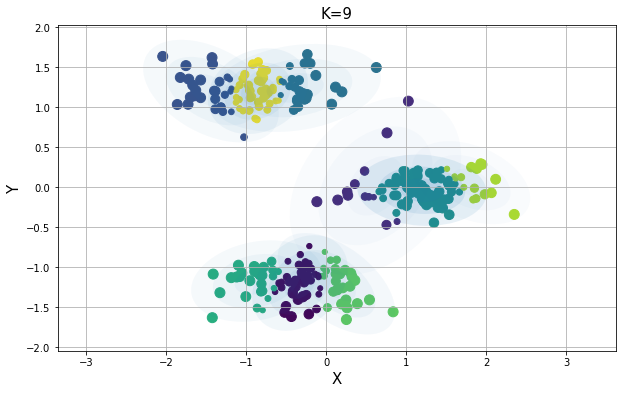

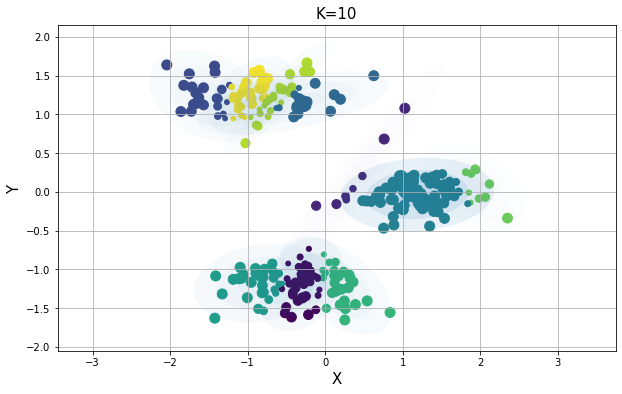

In [ ]:
SSE_q1a = []
SSE_q1a_kmeans=[]
q1a_aic = []
q1a_bic = []
axes_label=['X','Y']
for i in range(1,11):
  # GMM
  gmm = GaussianMixture(n_components=i, covariance_type='full', random_state=0).fit(df_scaled)
  y_pred = gmm.predict(df_scaled)
  probs = gmm.predict_proba(df_scaled)

  # K-Means
  kmeans = KMeans(n_clusters = i, init='k-means++')
  kmeans.fit(df_scaled)

  # Creating plot
  centers = np.zeros((i,2))
  for j in range(i):
      density = mvn(cov=gmm.covariances_[j], mean=gmm.means_[j]).logpdf(df_scaled)
      centers[j, :] = df_scaled[np.argmax(density)]
  plot_2D(df_scaled, centers, y_pred, gmm, axes_label)

  #Calculate SSE
  SSE_q1a.append(find_inertia(i,centers,df_scaled))
  SSE_q1a_kmeans.append(kmeans.inertia_)
  q1a_aic.append(gmm.aic(df_scaled))
  q1a_bic.append(gmm.bic(df_scaled))

#Q1a 4) Plot elbow curve

Text(0.5, 0, 'K(number of clusters)')

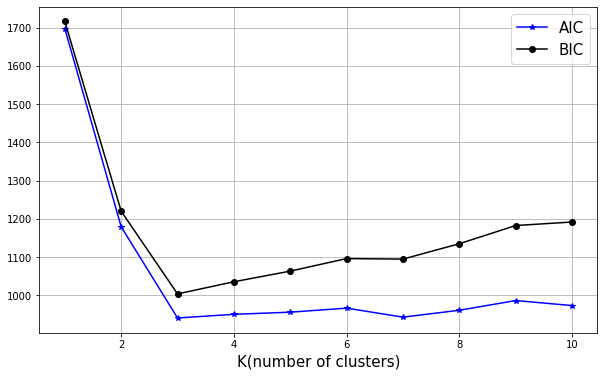

In [ ]:
x_axis=np.arange(1,11)
plt.figure(figsize=[10,6])
plt.plot(x_axis,q1a_aic,'b-*')
plt.plot(x_axis,q1a_bic,'k-o')
plt.grid()
plt.legend(['AIC','BIC'],fontsize=15)
plt.xlabel('K(number of clusters)',fontsize=15)

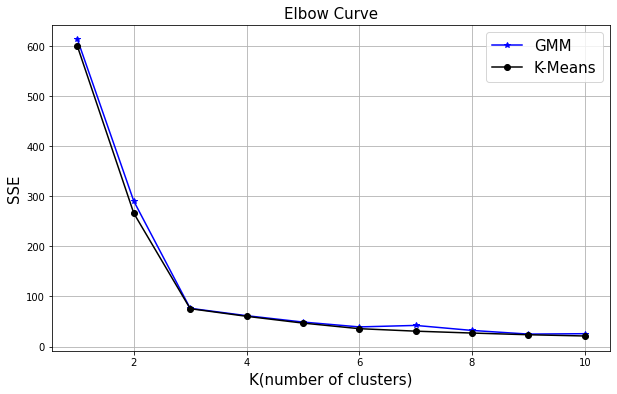

In [ ]:
x_axis=np.arange(1,11)
plt.figure(figsize=[10,6])
plt.plot(x_axis,SSE_q1a,'b-*')
plt.plot(x_axis,SSE_q1a_kmeans,'k-o')
plt.grid()
plt.ylabel('SSE',fontsize=15)
plt.xlabel('K(number of clusters)',fontsize=15)
plt.title('Elbow Curve',fontsize=15)
plt.legend(['GMM','K-Means'],fontsize=15)

# Q1b

In [ ]:
data2 = pd.read_excel('Question2b.xls')
data2.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


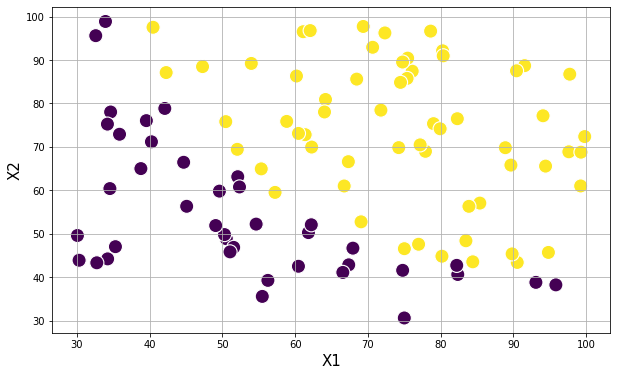

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data2['x1'],data2['x2'],s=200,c=data2['y'])
plt.xlabel('X1',fontsize=15)
plt.ylabel('X2',fontsize=15)
plt.grid()

In [ ]:
# Standardize data
df2=[]
df2.append(data2['x1'])
df2.append(data2['x2'])
df2=np.array(df2).transpose()
scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(df2)

#Q1b 3) Visualize the cluster formation for each k

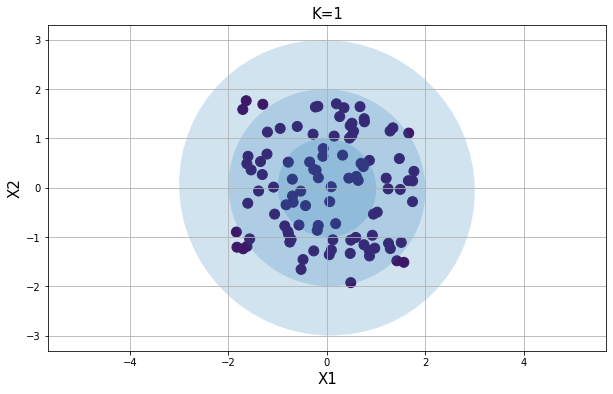

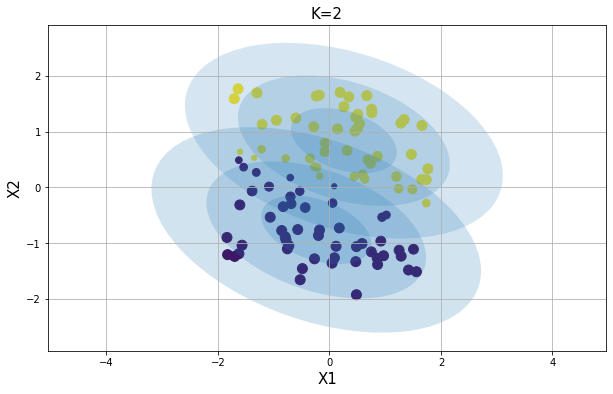

Accuracy for k=2:  0.79


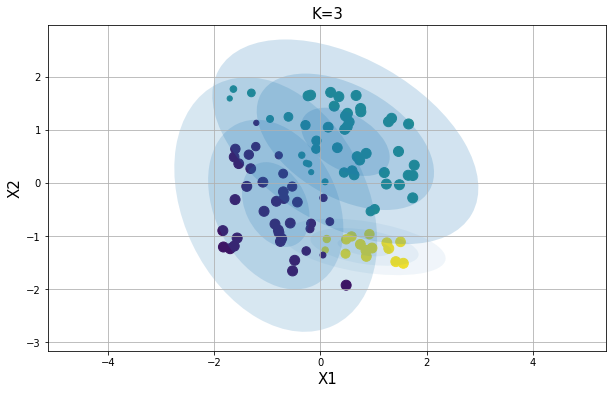

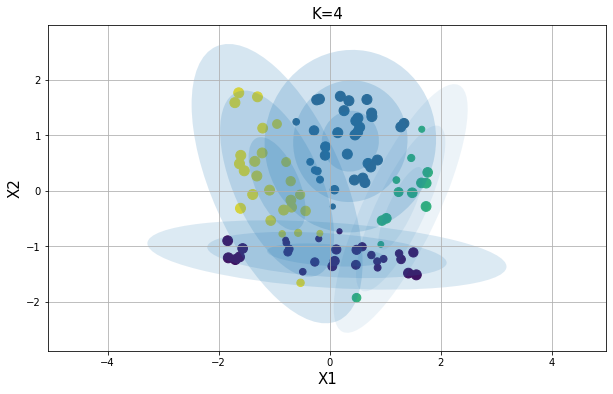

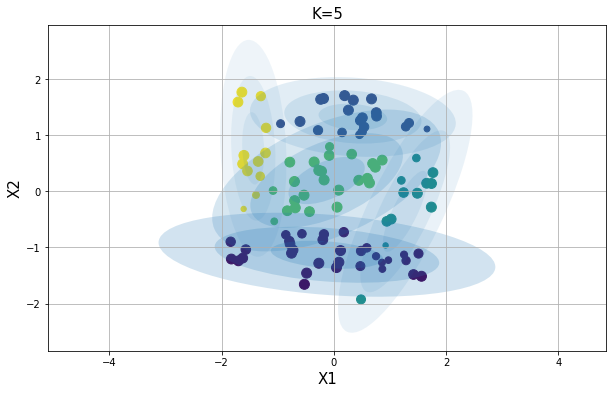

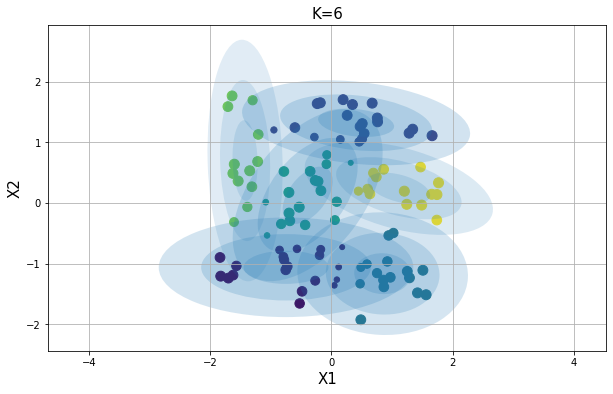

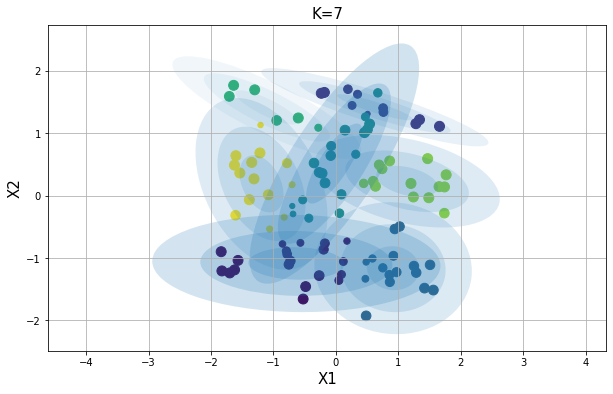

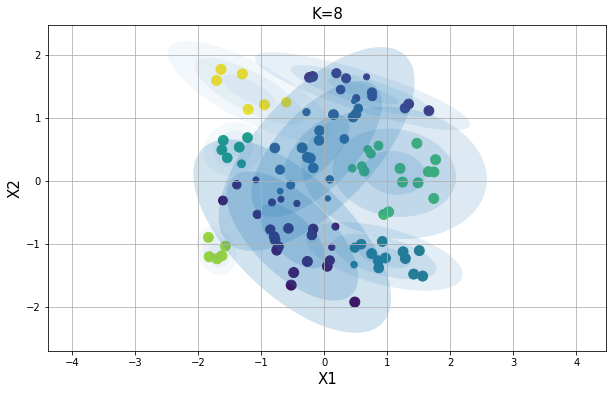

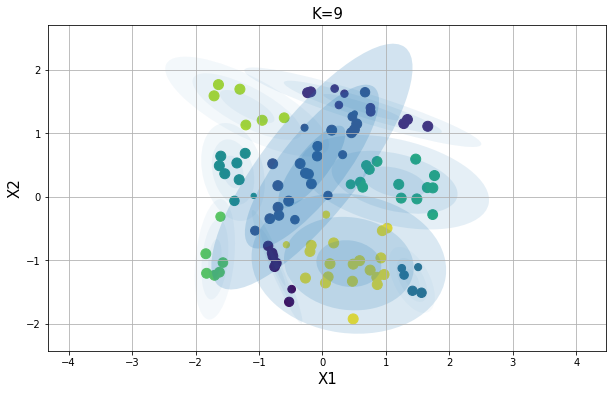

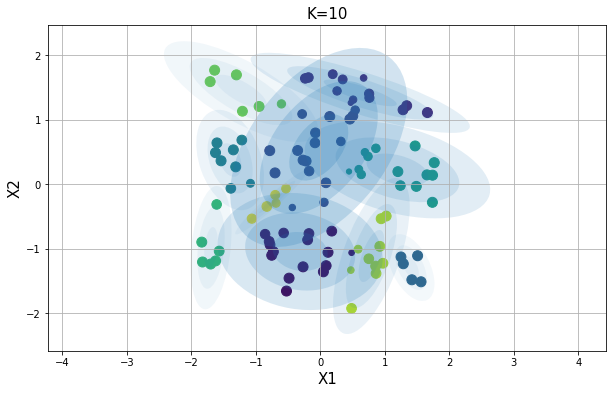

In [ ]:
SSE_q1b = []
SSE_q1b_kmeans=[]
q1b_aic=[]
q1b_bic=[]
n_iter = []
axes_label=['X1','X2']
for i in range(1,11):
  # GMM
  gmm = GaussianMixture(n_components=i, covariance_type='full', random_state=0).fit(df_scaled2)
  y_pred = gmm.predict(df_scaled2)
  probs = gmm.predict_proba(df_scaled2)
  n_iter.append(gmm.n_iter_)
  
  # K-Means
  kmeans = KMeans(n_clusters = i, init='k-means++')
  kmeans.fit(df_scaled2)

  # Creating plot
  centers = np.zeros((i,2))
  for j in range(i):
      density = mvn(cov=gmm.covariances_[j], mean=gmm.means_[j]).logpdf(df_scaled2)
      centers[j, :] = df_scaled2[np.argmax(density)]
  plot_2D(df_scaled2, centers, y_pred, gmm, axes_label)
  
  if i==2:
    print('Accuracy for k=2: ',accuracy_score(data2['y'],y_pred))

  #Calculate SSE
  SSE_q1b.append(find_inertia(i,centers,df_scaled2))
  SSE_q1b_kmeans.append(kmeans.inertia_)
  q1b_aic.append(gmm.aic(df_scaled2))
  q1b_bic.append(gmm.bic(df_scaled2))

#Q1b 4) Plot elbow curve

Text(0.5, 0, 'K(number of clusters)')

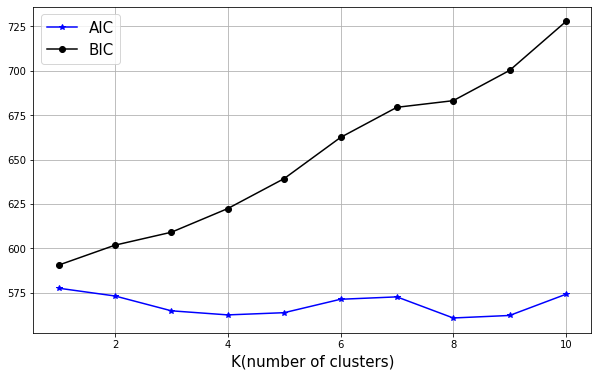

In [ ]:
x_axis=np.arange(1,11)
plt.figure(figsize=[10,6])
plt.plot(x_axis,q1b_aic,'b-*')
plt.plot(x_axis,q1b_bic,'k-o')
plt.grid()
plt.legend(['AIC','BIC'],fontsize=15)
plt.xlabel('K(number of clusters)',fontsize=15)

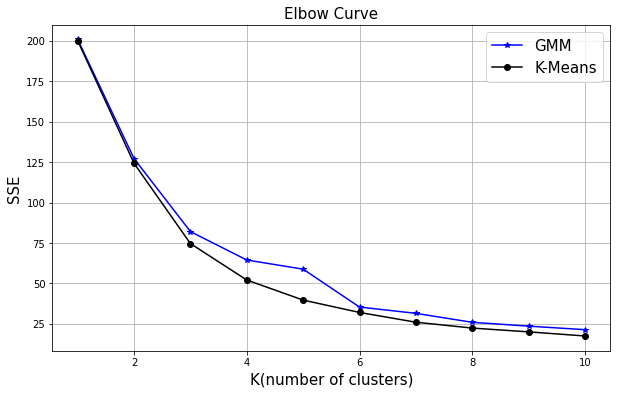

In [ ]:
x_axis=np.arange(1,11)
plt.figure(figsize=[10,6])
plt.plot(x_axis,SSE_q1b,'b-*')
plt.plot(x_axis,SSE_q1b_kmeans,'k-o')
plt.grid()
plt.ylabel('SSE',fontsize=15)
plt.xlabel('K(number of clusters)',fontsize=15)
plt.title('Elbow Curve',fontsize=15)
plt.legend(['GMM','K-Means'],fontsize=15)

# Q2

In [ ]:
data = pd.read_csv('dataset3.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Annual Income and Spending Score

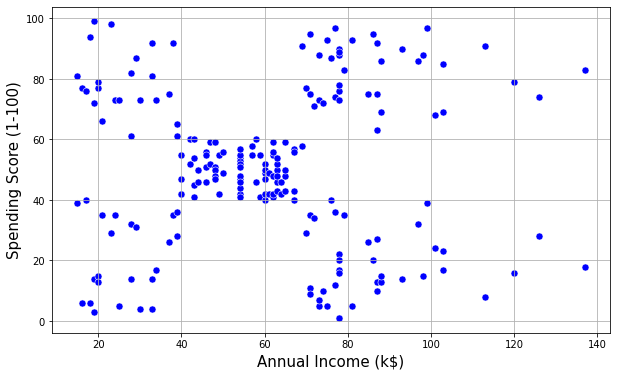

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'],
                y=data['Spending Score (1-100)'], color='b', s=50)
plt.xlabel('Annual Income (k$)', fontsize=15)
plt.ylabel('Spending Score (1-100)', fontsize=15)
plt.grid()


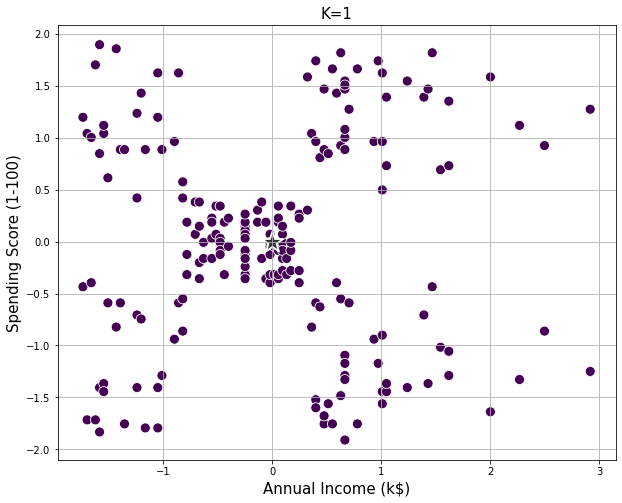

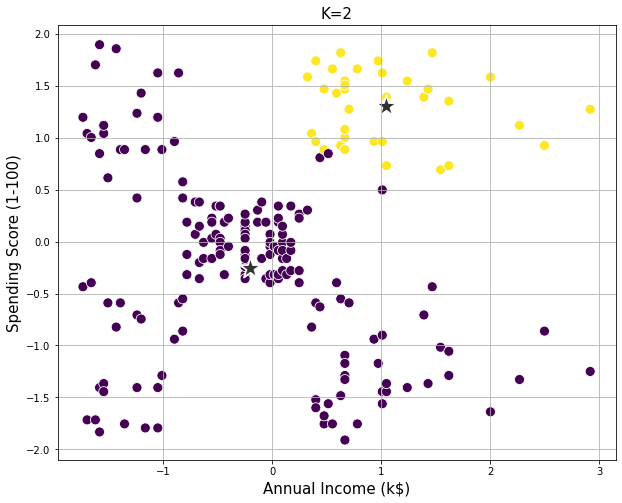

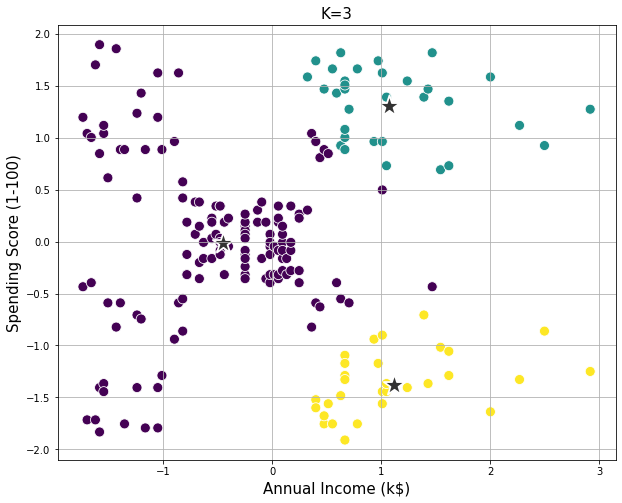

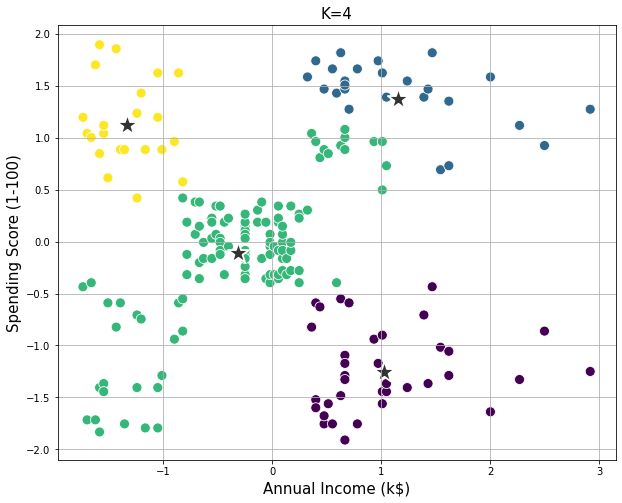

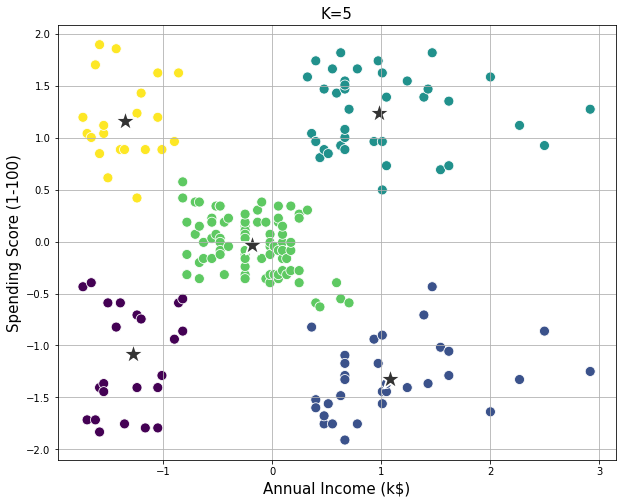

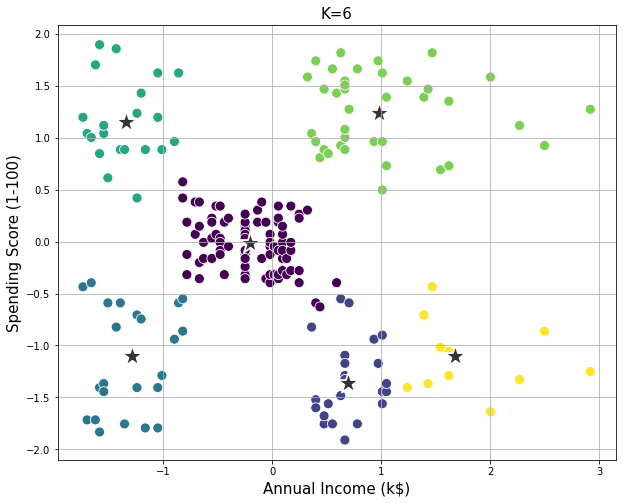

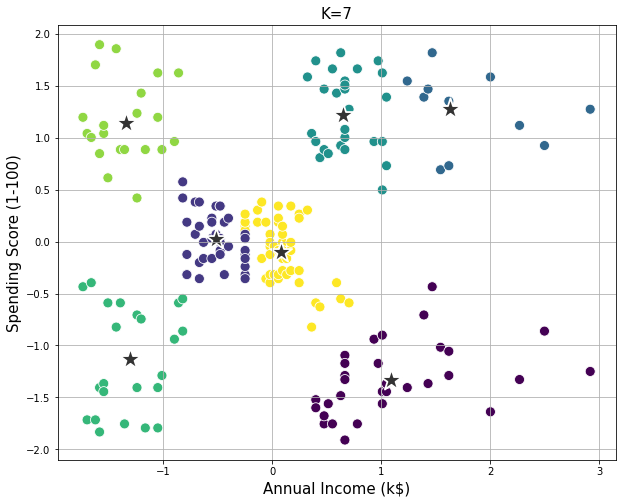

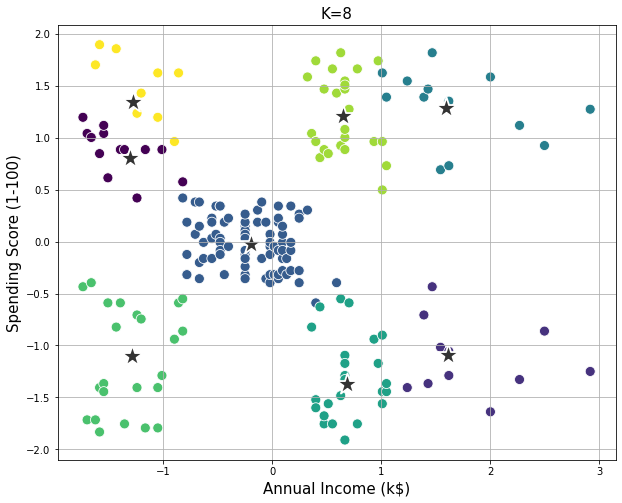

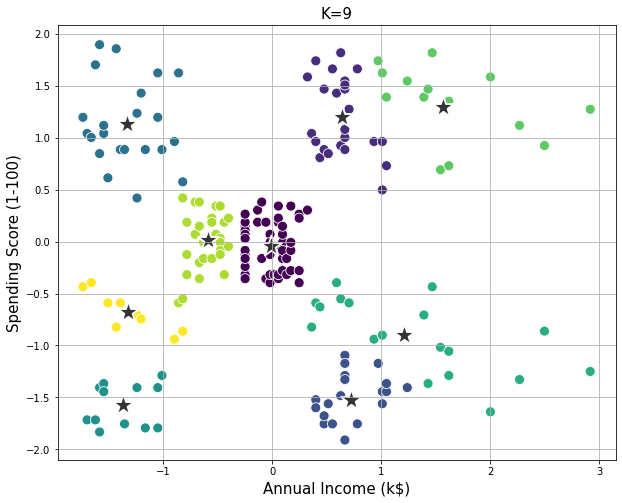

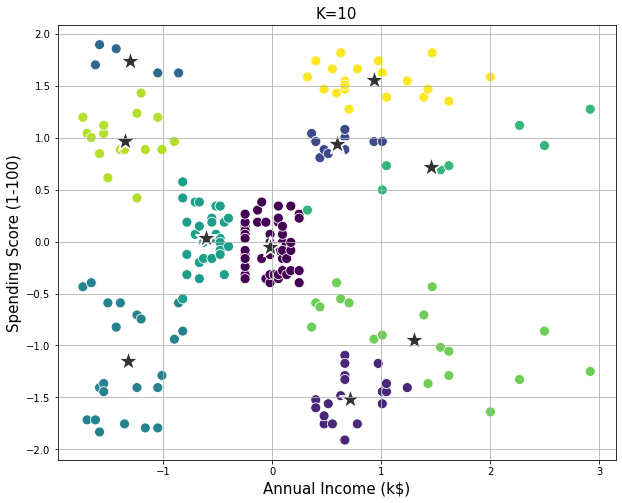

In [ ]:
df = []
df.append(data['Annual Income (k$)'])
df.append(data['Spending Score (1-100)'])
df = np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

k_set = [int(i) for i in range(1, 11)]

for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    y_pred = gm.predict(df_scaled)

    plt.figure(figsize=[10, 8])
    sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], c=y_pred, s=100)
    centers = gm.means_
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1],
                    color='.2', marker='*', s=500)
    plt.grid()
    plt.title('K='+str(k), fontsize=15)
    plt.xlabel('Annual Income (k$)', fontsize=15)
    plt.ylabel('Spending Score (1-100)', fontsize=15)
    plt.show()


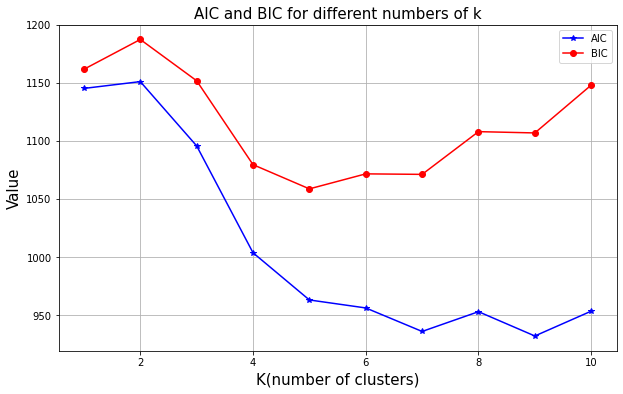

In [ ]:
sum_bic = []
sum_aic = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    sum_bic.append(gm.bic(df_scaled))
    sum_aic.append(gm.aic(df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sum_aic, 'b-*', label='AIC')
plt.plot(x_axis, sum_bic, 'r-o', label='BIC')
plt.grid()
plt.title('AIC and BIC for different numbers of k', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.legend(loc='upper right')
plt.show()


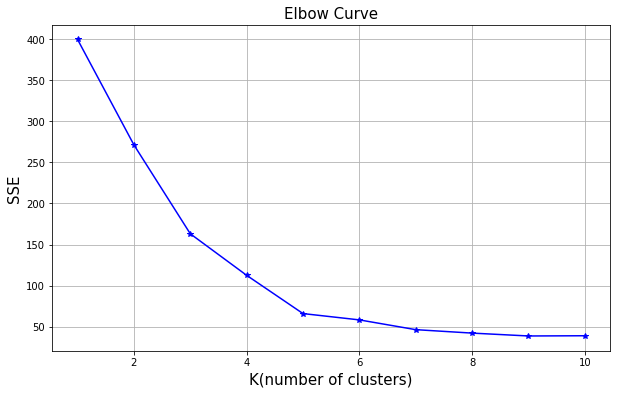

In [ ]:
sse = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    centers = gm.means_
    sse.append(find_inertia(k, centers, df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sse, 'b-*')
plt.grid()
plt.title('Elbow Curve', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.show()


Therefore, there area five clusters in which the income and spending score (and hence the spending habits) can be divided. 

## Age and Spending

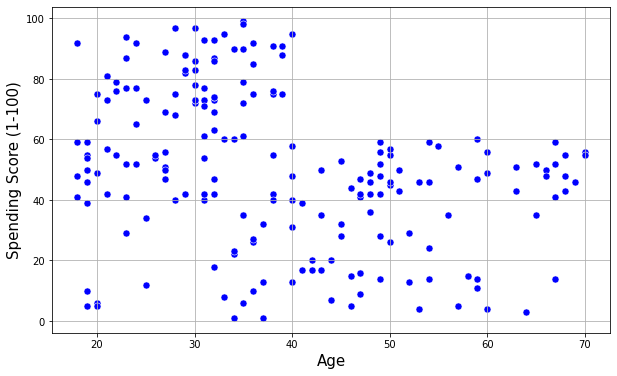

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Age'], y=data['Spending Score (1-100)'], color='b', s=50)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Spending Score (1-100)', fontsize=15)
plt.grid()


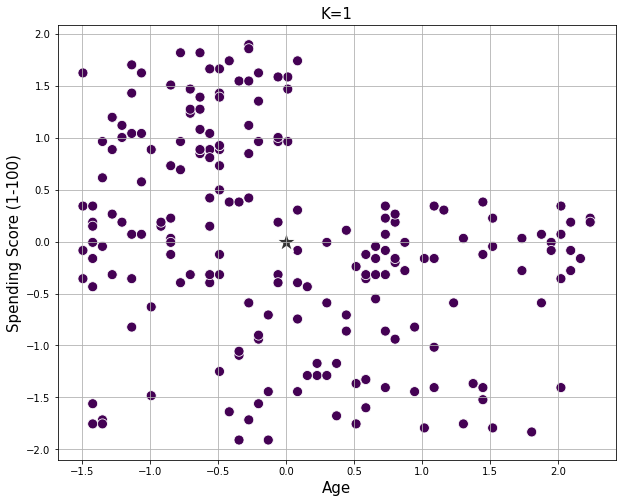

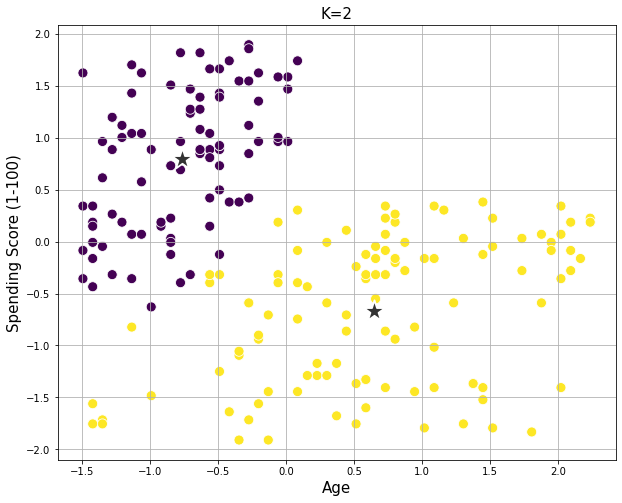

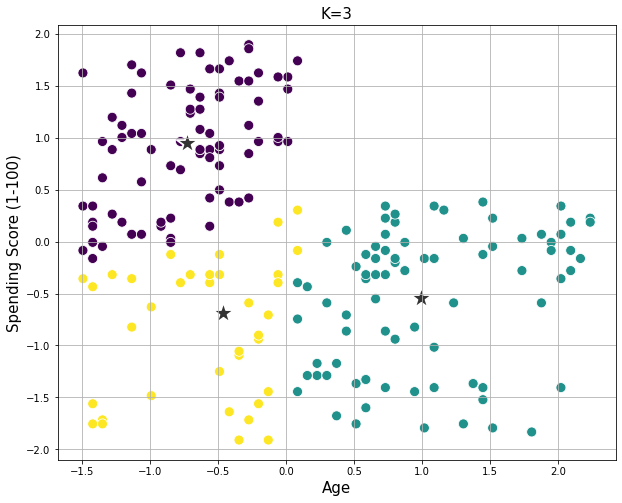

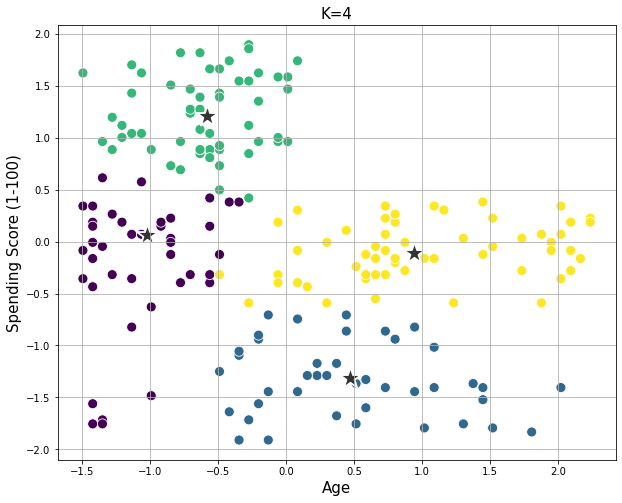

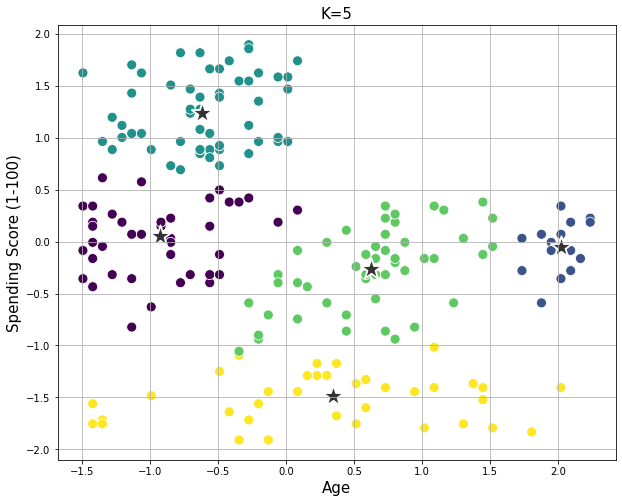

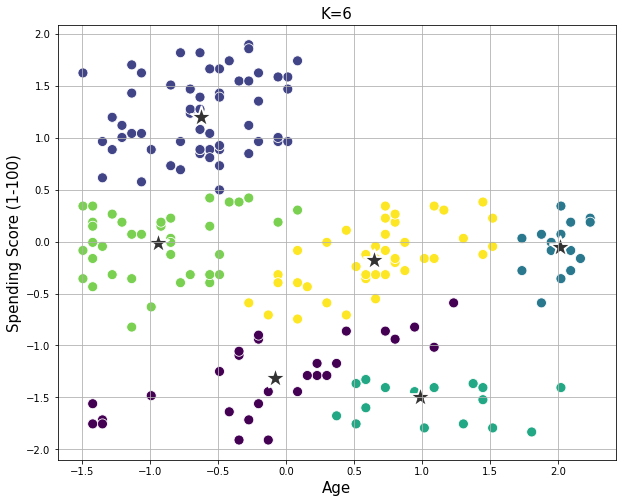

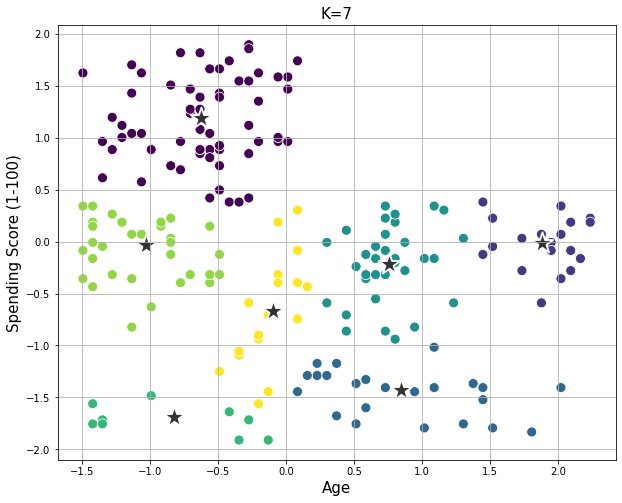

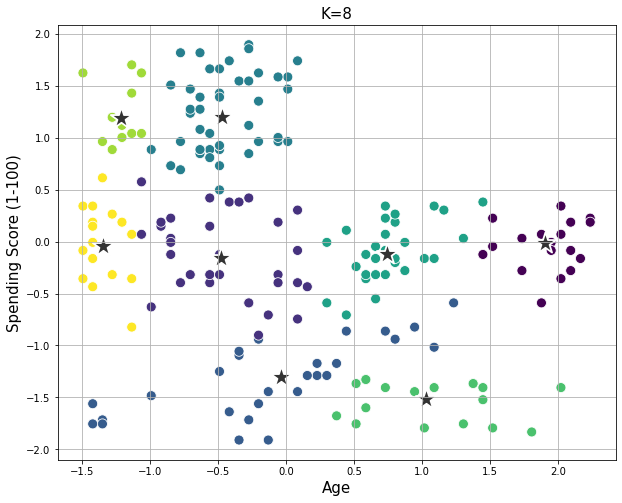

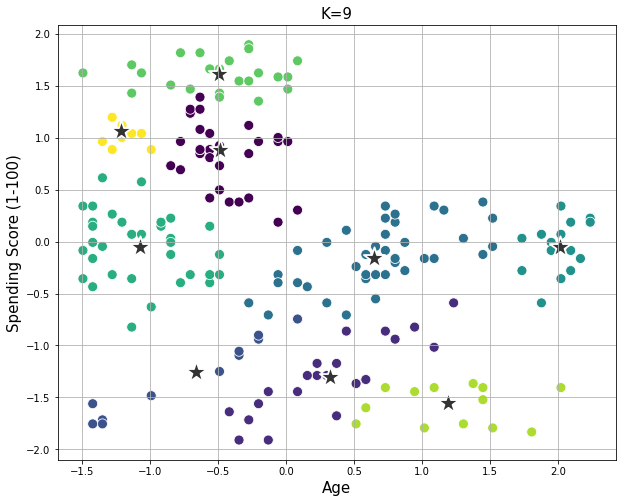

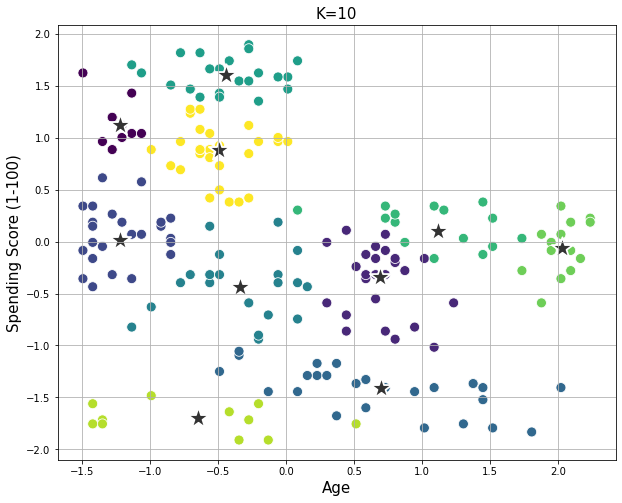

In [ ]:
df = []
df.append(data['Age'])
df.append(data['Spending Score (1-100)'])
df = np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

k_set = [int(i) for i in range(1, 11)]

for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    y_pred = gm.predict(df_scaled)

    plt.figure(figsize=[10, 8])
    sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], c=y_pred, s=100)
    centers = gm.means_
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1],
                    color='.2', marker='*', s=500)
    plt.grid()
    plt.title('K='+str(k), fontsize=15)
    plt.xlabel('Age', fontsize=15)
    plt.ylabel('Spending Score (1-100)', fontsize=15)
    plt.show()


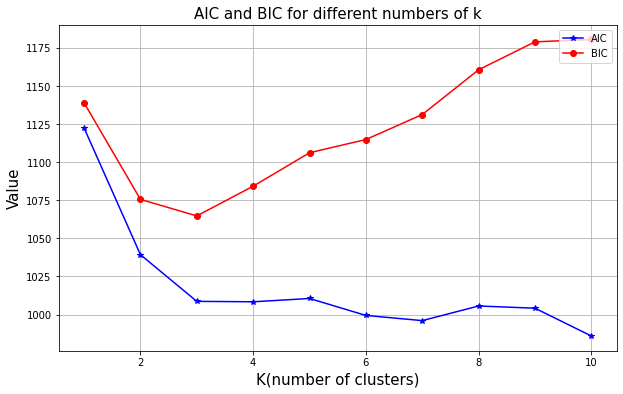

In [ ]:
sum_bic = []
sum_aic = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    sum_bic.append(gm.bic(df_scaled))
    sum_aic.append(gm.aic(df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sum_aic, 'b-*', label='AIC')
plt.plot(x_axis, sum_bic, 'r-o', label='BIC')
plt.grid()
plt.title('AIC and BIC for different numbers of k', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.legend(loc='upper right')
plt.show()


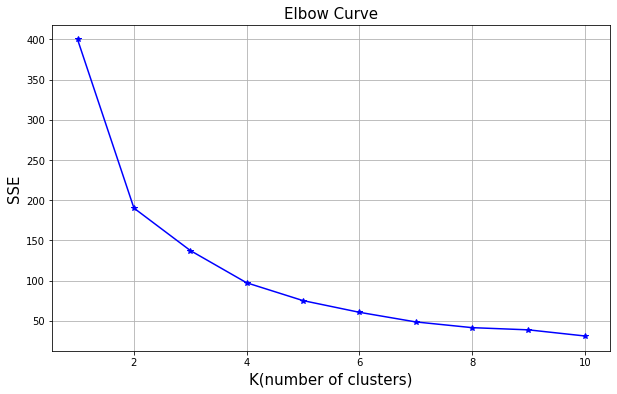

In [ ]:
sse = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    centers = gm.means_
    sse.append(find_inertia(k, centers, df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sse, 'b-*')
plt.grid()
plt.title('Elbow Curve', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.show()


4 clusters

## Age and Annual Income

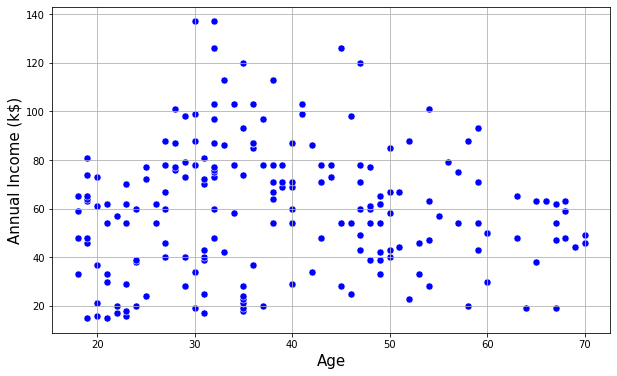

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], color='b', s=50)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Annual Income (k$)', fontsize=15)
plt.grid()


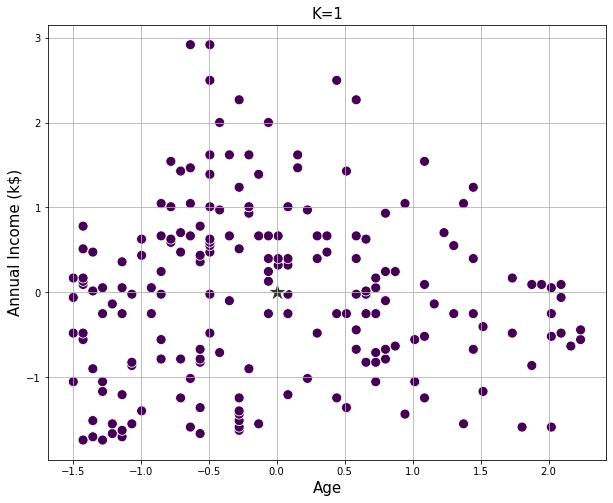

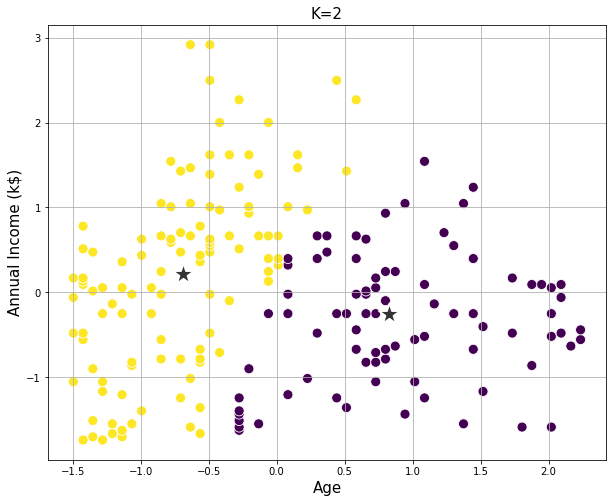

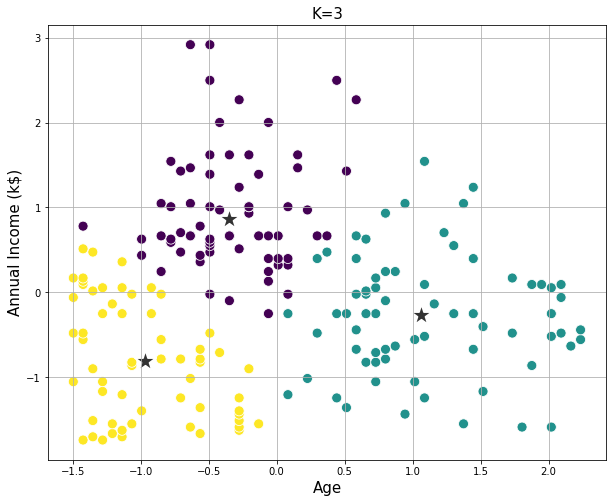

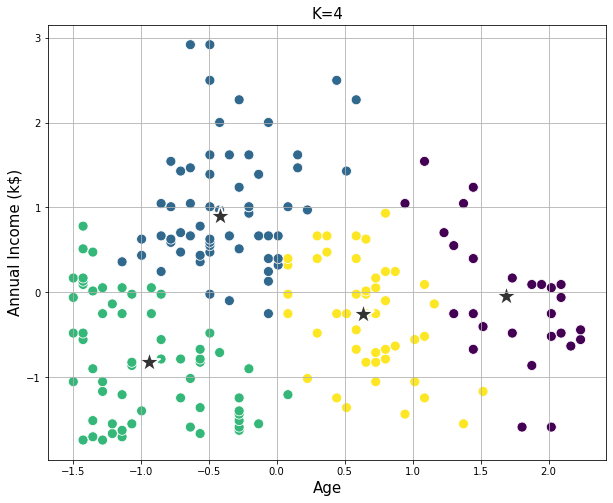

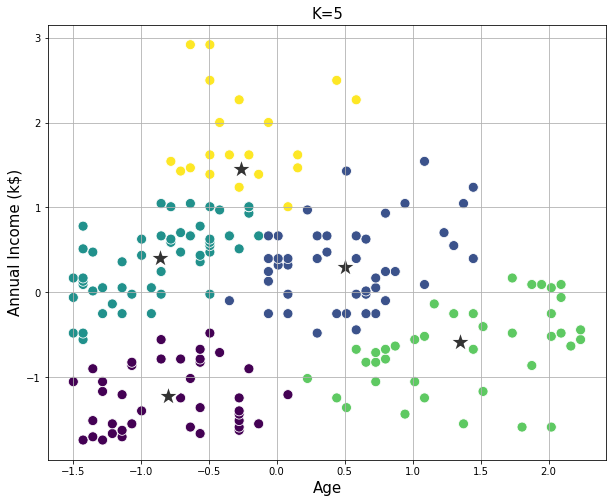

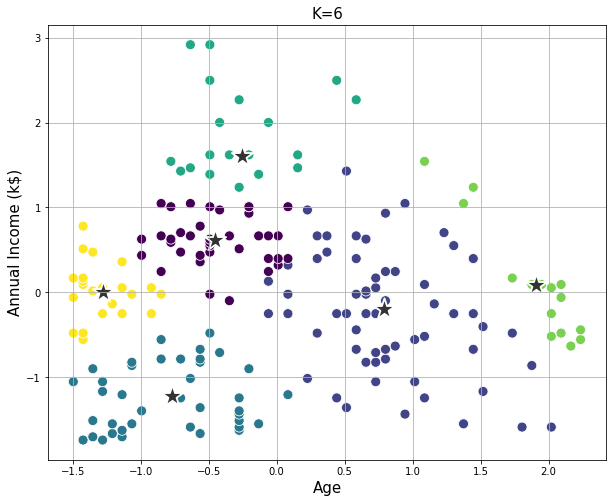

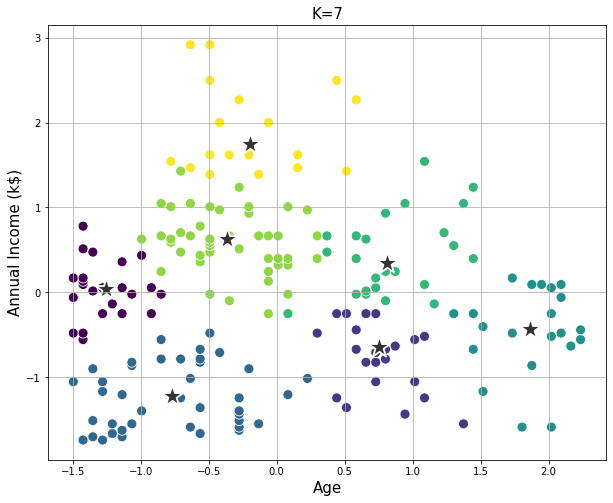

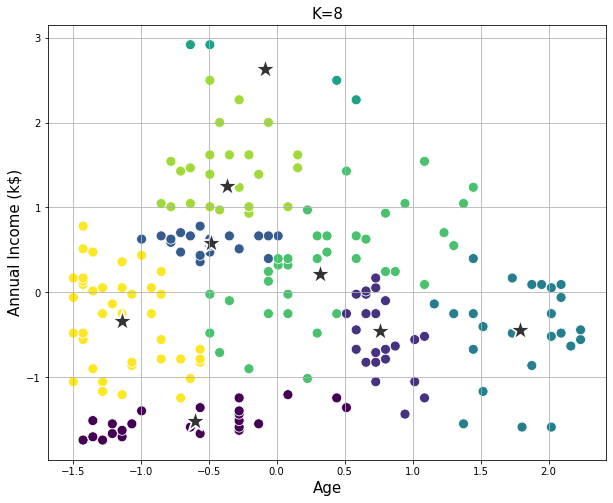

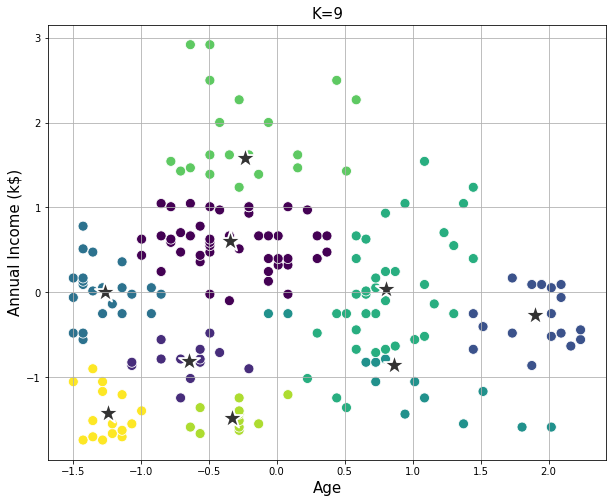

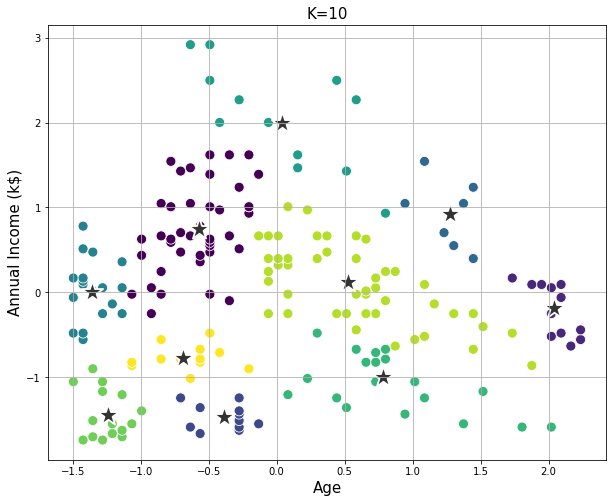

In [ ]:
df = []
df.append(data['Age'])
df.append(data['Annual Income (k$)'])
df = np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

k_set = [int(i) for i in range(1, 11)]

for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    y_pred = gm.predict(df_scaled)

    plt.figure(figsize=[10, 8])
    sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], c=y_pred, s=100)
    centers = gm.means_
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1],
                    color='.2', marker='*', s=500)
    plt.grid()
    plt.title('K='+str(k), fontsize=15)
    plt.xlabel('Age', fontsize=15)
    plt.ylabel('Annual Income (k$)', fontsize=15)
    plt.show()


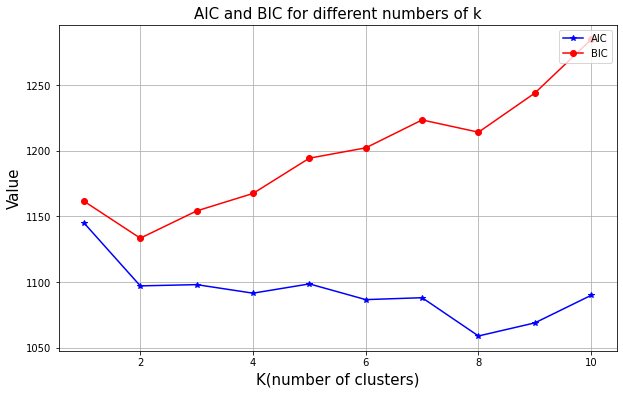

In [ ]:
sum_bic = []
sum_aic = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    sum_bic.append(gm.bic(df_scaled))
    sum_aic.append(gm.aic(df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sum_aic, 'b-*', label='AIC')
plt.plot(x_axis, sum_bic, 'r-o', label='BIC')
plt.grid()
plt.title('AIC and BIC for different numbers of k', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.legend(loc='upper right')
plt.show()


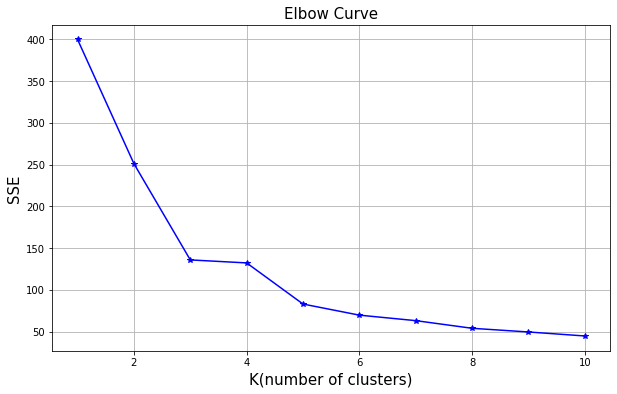

In [ ]:
sse = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    centers = gm.means_
    sse.append(find_inertia(k, centers, df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sse, 'b-*')
plt.grid()
plt.title('Elbow Curve', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.show()


3 clusters

## Gender and {Annual Income, Spending Score}

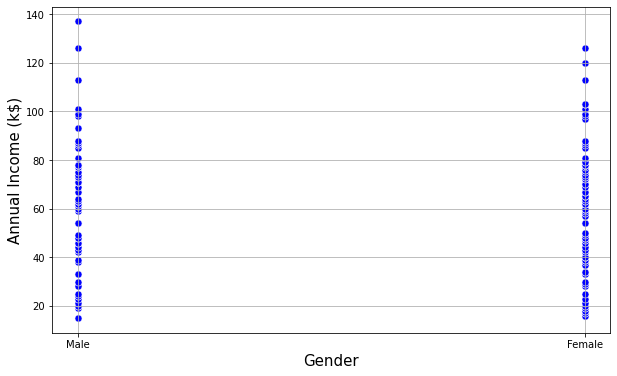

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Gender'],
                y=data['Annual Income (k$)'], color='b', s=50)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Annual Income (k$)', fontsize=15)
plt.grid()


In [ ]:
print(np.mean(data[data['Gender'] == 'Male']['Annual Income (k$)']))
print(np.std(data[data['Gender'] == 'Male']['Annual Income (k$)']))


62.22727272727273
26.486586344758496


In [ ]:
print(np.mean(data[data['Gender'] == 'Female']['Annual Income (k$)']))
print(np.std(data[data['Gender'] == 'Female']['Annual Income (k$)']))


59.25
25.8955663607278


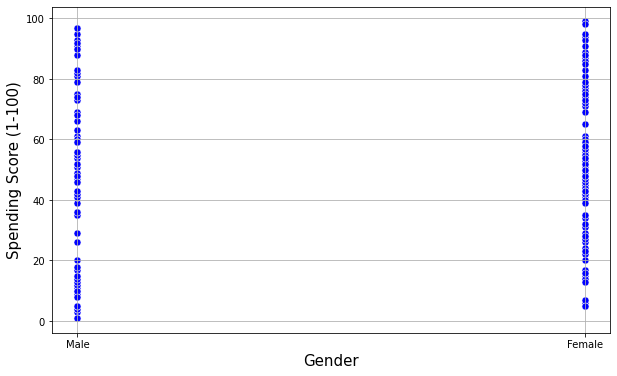

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Gender'],
                y=data['Spending Score (1-100)'], color='b', s=50)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Spending Score (1-100)', fontsize=15)
plt.grid()


In [ ]:
print(np.mean(data[data['Gender'] == 'Male']['Spending Score (1-100)']))
print(np.std(data[data['Gender'] == 'Male']['Spending Score (1-100)']))


48.51136363636363
27.737812359739767


In [ ]:
print(np.mean(data[data['Gender'] == 'Female']['Spending Score (1-100)']))
print(np.std(data[data['Gender'] == 'Female']['Spending Score (1-100)']))


51.526785714285715
24.00705246880166
